### **Extract Zip file to normal file using zipfile lib**

In [2]:
import zipfile
from zipfile import ZipFile

with ZipFile("/content/drive/MyDrive/yolo models-20220818T225120Z-001.zip","r") as zipobj:
  zipobj.extractall("/content/drive/MyDrive/clothing-detection_DataBase")
  

##**Improt Libraries**


In [1]:
import numpy as np
import time
import cv2
import matplotlib.pyplot as plt

In [3]:
INPUT_FILE='/content/5bopus7523mzh4eky8d7zhceoq84mbg5cyidrp29a0j4zxtkavdxc3mf2en6guid.jpg'
#OUTPUT_FILE='predicted.jpg'
LABELS_FILE='/content/drive/MyDrive/clothing-detection_DataBase/yolo models/df2.names'
CONFIG_FILE='/content/drive/MyDrive/clothing-detection_DataBase/yolo models/yolov3-df2.cfg'
WEIGHTS_FILE='/content/drive/MyDrive/clothing-detection_DataBase/yolo models/yolov3-modanet_last.weights'
CONFIDENCE_THRESHOLD=0.3

In [4]:
LABELS = open(LABELS_FILE).read().strip().split("\n")

In [5]:
np.random.seed(4)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),
	dtype="uint8")


###**Yolo Model**

In [6]:
net = cv2.dnn.readNetFromDarknet(CONFIG_FILE, WEIGHTS_FILE)

image = cv2.imread(INPUT_FILE)
(H, W) = image.shape[:2]


In [7]:
# determine only the *output* layer names that we need from YOLO
ln = net.getLayerNames()
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]



In [8]:
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),
	swapRB=True, crop=False)
net.setInput(blob)
start = time.time()
layerOutputs = net.forward(ln)
end = time.time()


In [9]:
print("[INFO] YOLO took {:.6f} seconds".format(end - start))


# initialize our lists of detected bounding boxes, confidences, and
# class IDs, respectively
boxes = []
confidences = []
classIDs = []

[INFO] YOLO took 2.213385 seconds


In [10]:
# loop over each of the layer outputs
for output in layerOutputs:
	# loop over each of the detections
	for detection in output:
		# extract the class ID and confidence (i.e., probability) of
		# the current object detection
		scores = detection[5:]
		classID = np.argmax(scores)
		confidence = scores[classID]

		# filter out weak predictions by ensuring the detected
		# probability is greater than the minimum probability
		if confidence > CONFIDENCE_THRESHOLD:
			# scale the bounding box coordinates back relative to the
			# size of the image, keeping in mind that YOLO actually
			# returns the center (x, y)-coordinates of the bounding
			# box followed by the boxes' width and height
			box = detection[0:4] * np.array([W, H, W, H])
			(centerX, centerY, width, height) = box.astype("int")

			# use the center (x, y)-coordinates to derive the top and
			# and left corner of the bounding box
			x = int(centerX - (width / 2))
			y = int(centerY - (height / 2))

			# update our list of bounding box coordinates, confidences,
			# and class IDs
			boxes.append([x, y, int(width), int(height)])
			confidences.append(float(confidence))
			classIDs.append(classID)


In [11]:
# apply non-maxima suppression to suppress weak, overlapping bounding
# boxes
idxs = cv2.dnn.NMSBoxes(boxes, confidences, CONFIDENCE_THRESHOLD,
	CONFIDENCE_THRESHOLD)


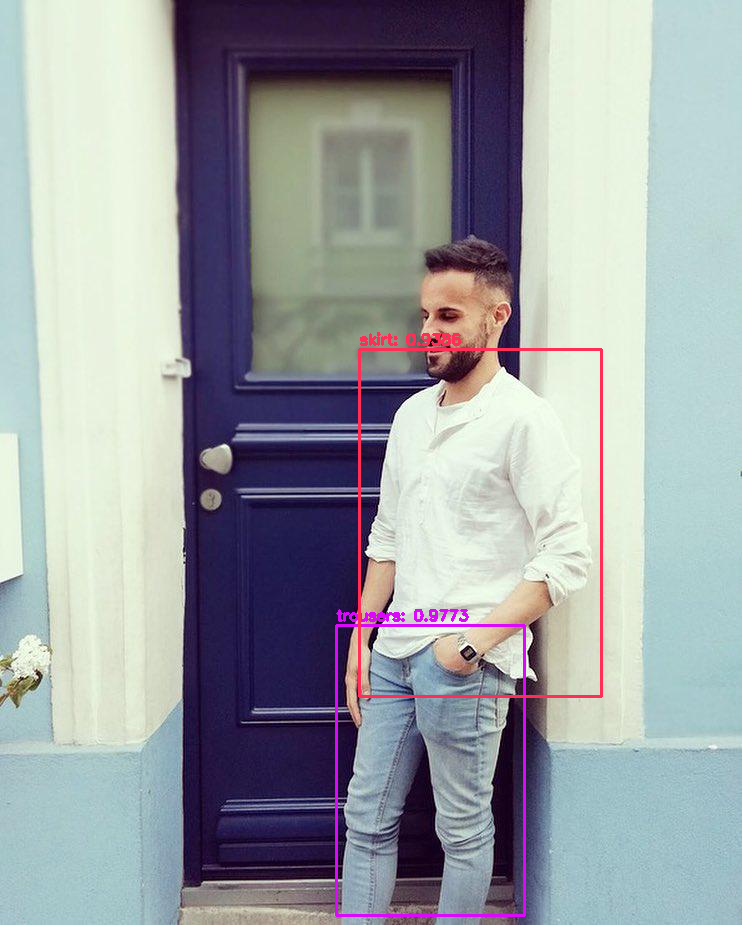

In [22]:
from google.colab.patches import cv2_imshow

# ensure at least one detection exists
if len(idxs) > 0:
	# loop over the indexes we are keeping
	for i in idxs.flatten():
		# extract the bounding box coordinates
		(x, y) = (boxes[i][0], boxes[i][1])
		(w, h) = (boxes[i][2], boxes[i][3])

		color = [int(c) for c in COLORS[classIDs[i]]]

		cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
		text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
		cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
			0.5, color, 2)
	# show the output image
	cv2_imshow(image)
	key = cv2.waitKey(1)
	if key == 27:
		print("[button pressed] ///// [esc].")
		#print("[feedback] ///// Videocapturing succesfully stopped")



In [16]:
# save image file
cv2.imwrite("example.png", image)

True